# Outliers

In [1]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
hourly_traffic = [
    120, 123, 124, 119, 196, 
    121, 118, 117, 500, 132
]

In [3]:
pd.Series(hourly_traffic) > pd.Series(hourly_traffic).quantile(0.95)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
dtype: bool

In [4]:
class PercentileDetection:
    
    def __init__(self, percentile=0.9):
        self.percentile = percentile
        
    def fit(self, x, y=None):
        self.threshold = pd.Series(x).quantile(self.percentile)
        
    def predict(self, x, y=None):
        return (pd.Series(x) > self.threshold).values
    
    def fit_predict(self, x, y=None):
        self.fit(x)
        return self.predict(x)

In [5]:
outlierd = PercentileDetection(percentile=0.9)
outlierd.fit_predict(hourly_traffic)

array([False, False, False, False, False, False, False, False,  True,
       False])

In [6]:
outlierd = PercentileDetection(percentile=0.95)

pd.DataFrame(
    {
        'hourly_traffic': hourly_traffic,
        'is_outlier': outlierd.fit_predict(hourly_traffic)
    }
).style.apply(
    lambda row: ['font-weight: bold'] * len(row) 
        if row['is_outlier'] == True 
        else ['font-weight: normal'] * len(row),
    axis=1
)

,hourly_traffic,is_outlier
0,120,False
1,123,False
2,124,False
3,119,False
4,196,False
5,121,False
6,118,False
7,117,False
8,500,True
9,132,False


# KDD Cup 99

In [7]:
from sklearn.datasets import fetch_kddcup99

data = fetch_kddcup99(subset='http')

In [8]:
x = data['data']
y = data['target'] != b'normal.'

# Synth Dataset

In [9]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
    n_classes=2, n_clusters_per_class=2, weights=[0.98, ], class_sep=0.5, 
    scale=1.0, shuffle=True, flip_y=0, random_state=0
)

In [10]:
x.shape, y.shape

((1000, 2), (1000,))

In [11]:
print(f'% of Anomalous Traffic: {y.mean():.2%}')

% of Anomalous Traffic: 2.00%


In [12]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

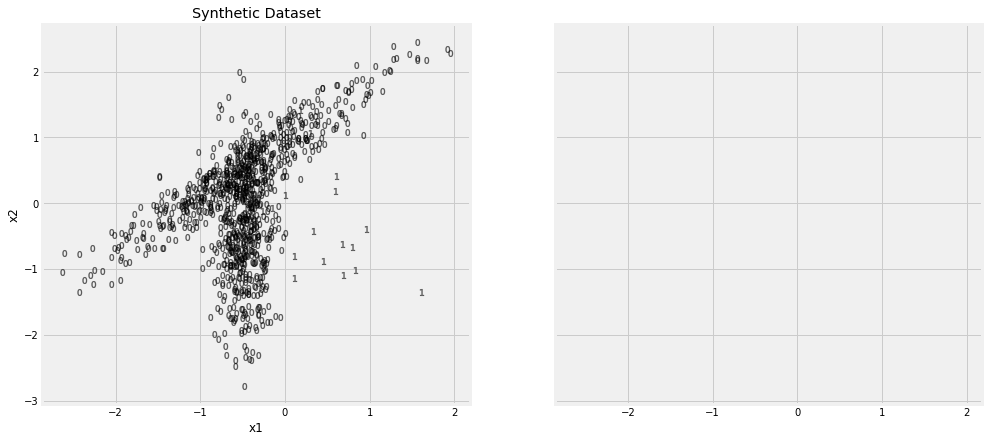

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharex=True, sharey=True)

for i, yval in enumerate(np.unique(y)):
    
    pd.DataFrame(x, columns=['x1', 'x2'])[
        y == yval
    ].plot(
        title=f'Synthetic Dataset',
        kind='scatter',
        x='x1', y='x2',
        color='k',
        marker=f'${yval}$',
        s=44,
        alpha=0.5,
        ax=axs[0]
    )
    

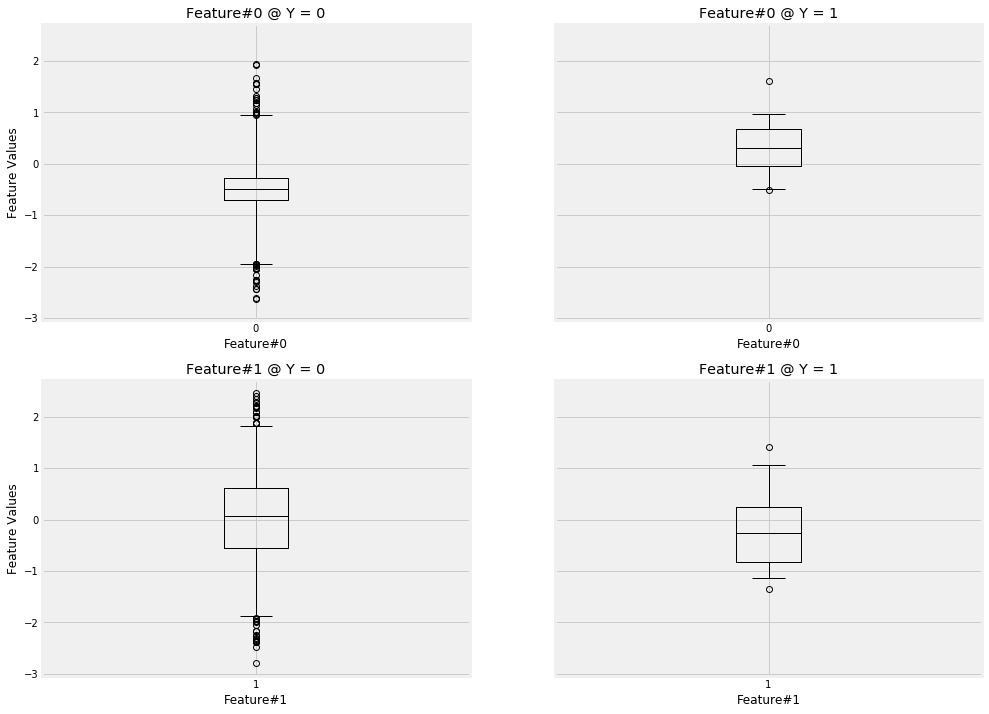

In [14]:
fig, axs = plt.subplots(x.shape[1], 2, figsize=(15, 12), sharey=True)

for i in range(x.shape[1]):
    
    pd.DataFrame(x)[
        y == 0
    ][i].plot(
        title=f'Feature#{i} @ Y = 0',
        kind='box',
        whis=(2, 98),
        color='k',
        grid=True,
        ax=axs[i][0]
    )
    
    pd.DataFrame(x)[
        y == 1
    ][i].plot(
        title=f'Feature#{i} @ Y = 1',
        kind='box',
        whis=(2, 98),
        color='k',
        grid=True,
        ax=axs[i][1]
    )
    
    axs[i][0].set_xlabel(f'Feature#{i}')
    axs[i][1].set_xlabel(f'Feature#{i}')
    
    axs[i][0].set_ylabel(f'Feature Values')
    axs[i][1].set_ylabel(f'Feature Values')

# Percentile Detection

In [15]:
class PercentileDetection:
    
    def __init__(self, percentile=0.9):
        self.percentile = percentile
        
    def fit(self, x, y=None):
        self.threshold = pd.Series(x).quantile(self.percentile)
        
    def predict(self, x, y=None):
        return (pd.Series(x) > self.threshold).values
    
    def fit_predict(self, x, y=None):
        self.fit(x)
        return self.predict(x)

In [16]:
outlierd = PercentileDetection(percentile=0.98)
y_pred = outlierd.fit_predict(x[:,0])

print(
    f'Threshold: {outlierd.threshold:.2f}, {y_pred.mean():.2%}'
)

Threshold: 0.96, 2.00%


In [17]:
from sklearn.metrics import precision_score, recall_score

print(
    'Precision: {:.02%}, Recall: {:.02%} [Percentile Detection]'.format(
        precision_score(y, y_pred, pos_label=1),
        recall_score(y, y_pred, pos_label=1),
    )
)

Precision: 5.00%, Recall: 5.00% [Percentile Detection]


In [18]:
outlierd = PercentileDetection(percentile=0.98)
y_pred = outlierd.fit_predict(x[:,1])

print(
    f'Threshold: {outlierd.threshold:.2f}, {y_pred.mean():.2%}'
)

Threshold: 1.82, 2.00%


In [19]:
from sklearn.metrics import precision_score, recall_score

print(
    'Precision: {:.02%}, Recall: {:.02%} [Percentile Detection]'.format(
        precision_score(y, y_pred, pos_label=1),
        recall_score(y, y_pred, pos_label=1),
    )
)

Precision: 0.00%, Recall: 0.00% [Percentile Detection]


In [20]:
class PercentileDetection:
    
    def __init__(self, percentile=0.9):
        self.percentile = percentile
        
    def fit(self, x, y=None):
        self.thresholds = [
            pd.Series(x[:,i]).quantile(self.percentile)
            for i in range(x.shape[1])
        ]
        
    def predict(self, x, y=None):
        return (x > self.thresholds).max(axis=1)
    
    def fit_predict(self, x, y=None):
        self.fit(x)
        return self.predict(x)

In [21]:
outlierd = PercentileDetection(percentile=0.98)
y_pred = outlierd.fit_predict(x) 

In [22]:
print(f'% of Anomalous Traffic: {y.mean():.2%}, Detected As Anomalous {y_pred.mean():.2%}')

% of Anomalous Traffic: 2.00%, Detected As Anomalous 2.50%


In [23]:
from sklearn.metrics import precision_score, recall_score

print(
    'Precision: {:.02%}, Recall: {:.02%} [Percentile Detection]'.format(
        precision_score(y, y_pred, pos_label=1),
        recall_score(y, y_pred, pos_label=1),
    )
)

Precision: 4.00%, Recall: 5.00% [Percentile Detection]


# Elliptic Envelope

In [24]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(random_state=0)
y_pred = ee.fit_predict(x) == -1

In [25]:
print(f'% of Anomalous Traffic: {y.mean():.2%}, Detected As Anomalous {y_pred.mean():.2%}')

% of Anomalous Traffic: 2.00%, Detected As Anomalous 10.00%


In [26]:
from sklearn.metrics import precision_score, recall_score

print(
    'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor]'.format(
        precision_score(y, y_pred, pos_label=1),
        recall_score(y, y_pred, pos_label=1),
    )
)

Precision: 9.00%, Recall: 45.00% [LocalOutlierFactor]


# Local Outlier Factor

In [27]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=50)
y_pred = lof.fit_predict(x) == -1

In [28]:
print(f'% of Anomalous Traffic: {y.mean():.2%}, Detected As Anomalous {y_pred.mean():.2%}')


% of Anomalous Traffic: 2.00%, Detected As Anomalous 5.00%


In [29]:
from sklearn.metrics import precision_score, recall_score

print(
    'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor]'.format(
        precision_score(y, y_pred, pos_label=1),
        recall_score(y, y_pred, pos_label=1),
    )
)

Precision: 26.00%, Recall: 65.00% [LocalOutlierFactor]


In [30]:
pd.Series(lof.negative_outlier_factor_).describe()

count    1000.000000
mean       -1.108791
std         0.280413
min        -4.862432
25%        -1.108732
50%        -1.030691
75%        -0.993094
max        -0.955223
dtype: float64

In [31]:
from sklearn.metrics import precision_score, recall_score

lof = LocalOutlierFactor(n_neighbors=50)
lof.fit(x)

for quantile in [0.01, 0.02, 0.1]:
    
    y_pred = lof.negative_outlier_factor_ < np.quantile(
        lof.negative_outlier_factor_, quantile
    ) 
    
    print(
        'LOF: Precision: {:.02%}, Recall: {:.02%} [Quantile={:.0%}]'.format(
            precision_score(y, y_pred, pos_label=1),
            recall_score(y, y_pred, pos_label=1),
            quantile
        )
    )

LOF: Precision: 80.00%, Recall: 40.00% [Quantile=1%]
LOF: Precision: 50.00%, Recall: 50.00% [Quantile=2%]
LOF: Precision: 14.00%, Recall: 70.00% [Quantile=10%]


In [32]:
from sklearn.metrics import precision_score, recall_score

for p in [1, 2, 100]:
    
    lof = LocalOutlierFactor(n_neighbors=50, p=p)
    y_pred = lof.fit_predict(x) == -1 
    
    print(
        'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor; p={}]'.format(
            precision_score(y, y_pred, pos_label=1),
            recall_score(y, y_pred, pos_label=1),
            p
        )
    )

Precision: 25.00%, Recall: 65.00% [LocalOutlierFactor; p=1]
Precision: 26.00%, Recall: 65.00% [LocalOutlierFactor; p=2]
Precision: 24.53%, Recall: 65.00% [LocalOutlierFactor; p=100]


In [33]:
from sklearn.metrics import precision_score, recall_score

for p in [1, 2, 100]:
    
    lof = LocalOutlierFactor(n_neighbors=3, p=p)
    y_pred = lof.fit_predict(x) == -1 
    
    print(
        'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor; p={}]'.format(
            precision_score(y, y_pred, pos_label=1),
            recall_score(y, y_pred, pos_label=1),
            p
        )
    )

Precision: 12.90%, Recall: 40.00% [LocalOutlierFactor; p=1]
Precision: 12.90%, Recall: 40.00% [LocalOutlierFactor; p=2]
Precision: 13.79%, Recall: 40.00% [LocalOutlierFactor; p=100]


In [34]:
from sklearn.metrics import precision_score, recall_score

for contamination in [0.01, 0.02, 0.05, 0.1, 0.2]:
    
    lof = LocalOutlierFactor(n_neighbors=10, contamination=contamination)
    y_pred = lof.fit_predict(x) == -1
    
    print(
        'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor; contamination={}]'.format(
            precision_score(y, y_pred, pos_label=1),
            recall_score(y, y_pred, pos_label=1),
            contamination
        )
    )
    
    

Precision: 80.00%, Recall: 40.00% [LocalOutlierFactor; contamination=0.01]
Precision: 60.00%, Recall: 60.00% [LocalOutlierFactor; contamination=0.02]
Precision: 28.00%, Recall: 70.00% [LocalOutlierFactor; contamination=0.05]
Precision: 15.00%, Recall: 75.00% [LocalOutlierFactor; contamination=0.1]
Precision: 7.50%, Recall: 75.00% [LocalOutlierFactor; contamination=0.2]


In [35]:
from sklearn.metrics import precision_score, recall_score

for n_neighbors in [1, 10, 20, 50, 100, 200]:
    
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, p=1)
    y_pred = lof.fit_predict(x) == -1
    
    print(
        'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor; n_neighbors={}]'.format(
            precision_score(y, y_pred, pos_label=1),
            recall_score(y, y_pred, pos_label=1),
            n_neighbors
        )
    )

Precision: 2.23%, Recall: 25.00% [LocalOutlierFactor; n_neighbors=1]
Precision: 44.83%, Recall: 65.00% [LocalOutlierFactor; n_neighbors=10]
Precision: 32.50%, Recall: 65.00% [LocalOutlierFactor; n_neighbors=20]
Precision: 25.00%, Recall: 65.00% [LocalOutlierFactor; n_neighbors=50]
Precision: 14.10%, Recall: 55.00% [LocalOutlierFactor; n_neighbors=100]
Precision: 8.77%, Recall: 50.00% [LocalOutlierFactor; n_neighbors=200]


## Novelty LOF

In [36]:
from sklearn.neighbors import LocalOutlierFactor

x_inliers = x[y==0]

lof = LocalOutlierFactor(n_neighbors=50, novelty=True)
lof.fit(x_inliers)
y_pred = lof.predict(x) == -1

In [37]:
print(f'% of Anomalous Traffic: {y.mean():.2%}, Detected As Anomalous {y_pred.mean():.2%}')

% of Anomalous Traffic: 2.00%, Detected As Anomalous 4.90%


In [38]:
from sklearn.metrics import precision_score, recall_score

print(
    'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor]'.format(
        precision_score(y, y_pred, pos_label=1),
        recall_score(y, y_pred, pos_label=1),
    )
)

Precision: 26.53%, Recall: 65.00% [LocalOutlierFactor]


# Isolation Forest

In [39]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=200, n_jobs=-1, random_state=10)
y_pred = iforest.fit_predict(x) == -1

In [40]:
print(f'% of Anomalous Traffic: {y.mean():.2%}, Detected As Anomalous {y_pred.mean():.2%}')


% of Anomalous Traffic: 2.00%, Detected As Anomalous 18.50%


In [41]:
from sklearn.metrics import precision_score, recall_score

print(
    'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor]'.format(
        precision_score(y, y_pred, pos_label=1),
        recall_score(y, y_pred, pos_label=1),
    )
)

Precision: 6.49%, Recall: 60.00% [LocalOutlierFactor]


In [42]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score

bootstrap_options = [False, True]

for bootstrap_option in bootstrap_options:
    
    iforest = IsolationForest(n_estimators=200, bootstrap=bootstrap_option, n_jobs=-1)
    y_pred = iforest.fit_predict(x) == -1
    
    print(
        'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor; bootstrap={}]'.format(
            precision_score(y, y_pred, pos_label=1),
            recall_score(y, y_pred, pos_label=1),
            bootstrap_option
        )
    )


Precision: 6.35%, Recall: 60.00% [LocalOutlierFactor; bootstrap=False]
Precision: 5.83%, Recall: 65.00% [LocalOutlierFactor; bootstrap=True]


In [43]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score

iforest = IsolationForest(n_jobs=-1)
iforest.fit(x)

for quantile in [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]:
    
    anomaly_score = iforest.decision_function(x)
    y_pred = anomaly_score < np.quantile(anomaly_score, quantile)
    
    print(
        'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor; Quantile={}]'.format(
            precision_score(y, y_pred, pos_label=1),
            recall_score(y, y_pred, pos_label=1),
            quantile
        )
    )
    

Precision: 10.00%, Recall: 5.00% [LocalOutlierFactor; Quantile=0.01]
Precision: 5.00%, Recall: 5.00% [LocalOutlierFactor; Quantile=0.02]
Precision: 10.00%, Recall: 25.00% [LocalOutlierFactor; Quantile=0.05]
Precision: 9.00%, Recall: 45.00% [LocalOutlierFactor; Quantile=0.1]
Precision: 6.00%, Recall: 60.00% [LocalOutlierFactor; Quantile=0.2]
Precision: 3.20%, Recall: 80.00% [LocalOutlierFactor; Quantile=0.5]


In [44]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score

for contamination in [0.01, 0.05, 0.1, 0.2]:
    
    iforest = IsolationForest(contamination=contamination, n_jobs=-1)
    y_pred = iforest.fit_predict(x) == -1
    
    print(
        'Precision: {:.02%}, Recall: {:.02%} [LocalOutlierFactor; contamination={}]'.format(
            precision_score(y, y_pred, pos_label=1),
            recall_score(y, y_pred, pos_label=1),
            contamination
        )
    )
    

Precision: 10.00%, Recall: 5.00% [LocalOutlierFactor; contamination=0.01]
Precision: 10.00%, Recall: 25.00% [LocalOutlierFactor; contamination=0.05]
Precision: 11.00%, Recall: 55.00% [LocalOutlierFactor; contamination=0.1]
Precision: 6.50%, Recall: 65.00% [LocalOutlierFactor; contamination=0.2]
